In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [13]:
df = pd.read_excel("C:/Users/Heber/Desktop/MACHINE_LEARNING/samples_clustering.xlsx")
df.head() #49 muestras

,ID,X,Y,CU,AU,ROCK
0,1,250,1750,1.079773,7.011241,2
1,2,250,1500,1.520868,7.368296,2
2,3,250,1250,1.623301,6.454517,2
3,4,250,1000,1.696151,5.745868,2
4,5,250,750,2.240153,7.373803,2


In [14]:
df["CU_N"] = (df["CU"] - df["CU"].min()) / (df["CU"].max() - df["CU"].min()) #normalización Cu
df["AU_N"] = (df["AU"] - df["AU"].min()) / (df["AU"].max() - df["AU"].min()) #normalización Au
df["ROCK_N"] = (df["ROCK"] - df["ROCK"].min()) / (df["ROCK"].max() - df["ROCK"].min()) #normalización tipo de roca
df.head()

,ID,X,Y,CU,AU,ROCK,CU_N,AU_N,ROCK_N
0,1,250,1750,1.079773,7.011241,2,0.245556,0.481137,1.0
1,2,250,1500,1.520868,7.368296,2,0.349926,0.514722,1.0
2,3,250,1250,1.623301,6.454517,2,0.374163,0.428771,1.0
3,4,250,1000,1.696151,5.745868,2,0.391401,0.362114,1.0
4,5,250,750,2.240153,7.373803,2,0.520120,0.515240,1.0


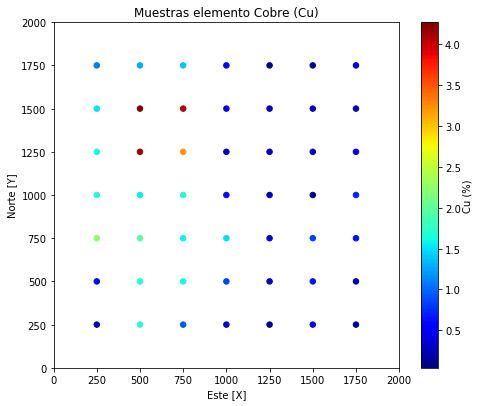

In [15]:
marker_size=30
plt.subplot(111)
plt.scatter(df["X"], df["Y"], marker_size, df["CU"], cmap = plt.cm.jet)
plt.xlabel('Este [X]')
plt.ylabel('Norte [Y]')
plt.title('Muestras elemento Cobre (Cu)')
plt.xlim(0,2000)
plt.ylim(0,2000)
cbar=plt.colorbar()
cbar.set_label('Cu (%)', labelpad=+1)
plt.subplots_adjust(left=0, bottom=0.0, right=1, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

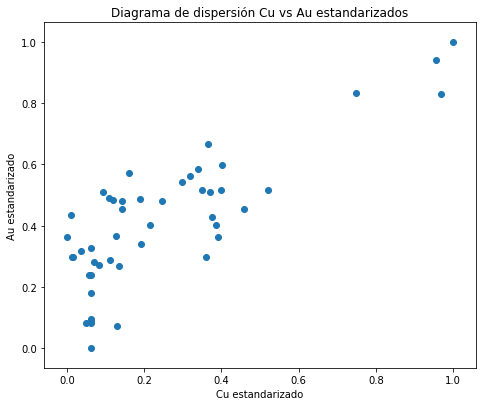

In [16]:
plt.subplot(111)
plt.scatter(df["CU_N"], df["AU_N"])
plt.title("Diagrama de dispersión Cu vs Au estandarizados")
plt.ylabel("Au estandarizado")
plt.xlabel("Cu estandarizado")
plt.subplots_adjust(left=0, bottom=0.0, right=1, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

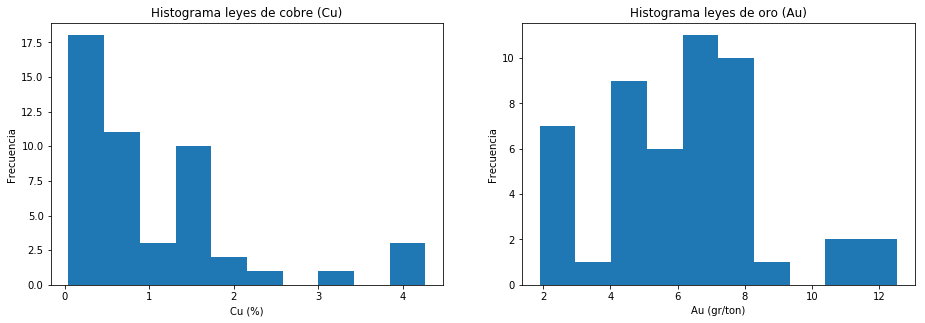

In [17]:
plt.subplot(221)
plt.hist(df["CU"])
plt.title("Histograma leyes de cobre (Cu)")
plt.xlabel("Cu (%)")
plt.ylabel("Frecuencia")
plt.subplot(222)
plt.hist(df["AU"])
plt.title("Histograma leyes de oro (Au)")
plt.xlabel("Au (gr/ton)")
plt.ylabel("Frecuencia")
plt.subplots_adjust(left=0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

In [18]:
datos = df.columns.values.tolist()[6:] # selección de las columnas unicamente a utilizar.
datos

['CU_N', 'AU_N', 'ROCK_N']

In [19]:
dd1 = distance_matrix(df[datos], df[datos], p=1) # Distancia Manhattan
dd2 = distance_matrix(df[datos], df[datos], p=2) # Distancia Euclidia
dd3 = distance_matrix(df[datos], df[datos], p=3) # Distancia Minkowski

In [20]:
def dm_to_df(dd, col_name): #función para convertir un ndarray en DataFrame
    import pandas as pd
    return pd.DataFrame(dd, index=col_name, columns=col_name)

In [21]:
df_dd1 = dm_to_df(dd1, df["ID"]) #matriz de distancia Manhattan
df_dd2 = dm_to_df(dd2, df["ID"]) #matriz de distancia Euclidia
df_dd3 = dm_to_df(dd3, df["ID"]) #matris de distancia Minkowski

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
df[datos].head()

,CU_N,AU_N,ROCK_N
0,0.245556,0.481137,1.0
1,0.349926,0.514722,1.0
2,0.374163,0.428771,1.0
3,0.391401,0.362114,1.0
4,0.520120,0.515240,1.0


**Método de Clustering Jerarquico:** 

In [24]:
#Matriz Z
Z = linkage(df[datos], method="average", metric="euclidean") #https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

#weighted, average, centroid y median funcionan bien.

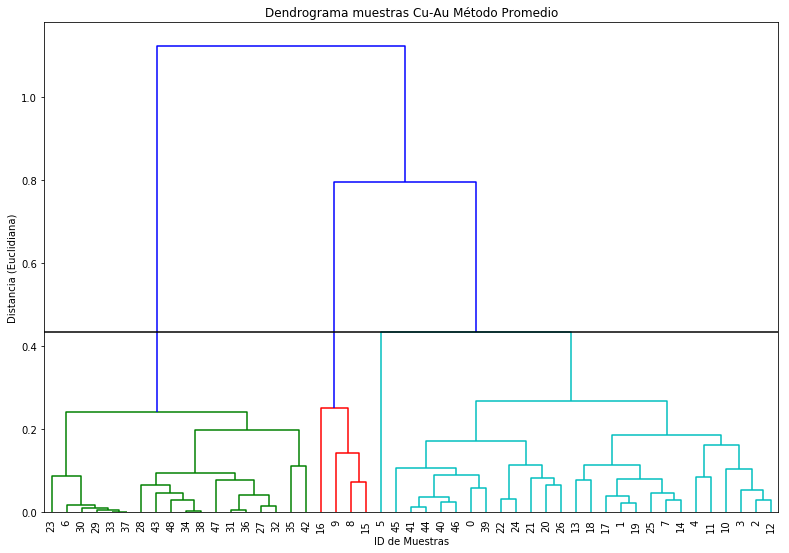

In [41]:
plt.subplot(111)
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.plot([0,1000],[0.43336819,0.43336819],color = 'black')
plt.title("Dendrograma muestras Cu-Au Método Promedio")
plt.ylabel("Distancia (Euclidiana)")
plt.xlabel("ID de Muestras")
plt.subplots_adjust(left=0, bottom=0.0, right=1.7, top=1.7, wspace=0.2, hspace=0.2)

plt.show()

In [26]:
Z[-4:]

array([[88.        , 89.        ,  0.26641723, 26.        ],
       [ 5.        , 93.        ,  0.43336819, 27.        ],
       [92.        , 94.        ,  0.79633356, 31.        ],
       [91.        , 95.        ,  1.12339199, 49.        ]])

**Truncar el Dendrograma:** Para mas datos...

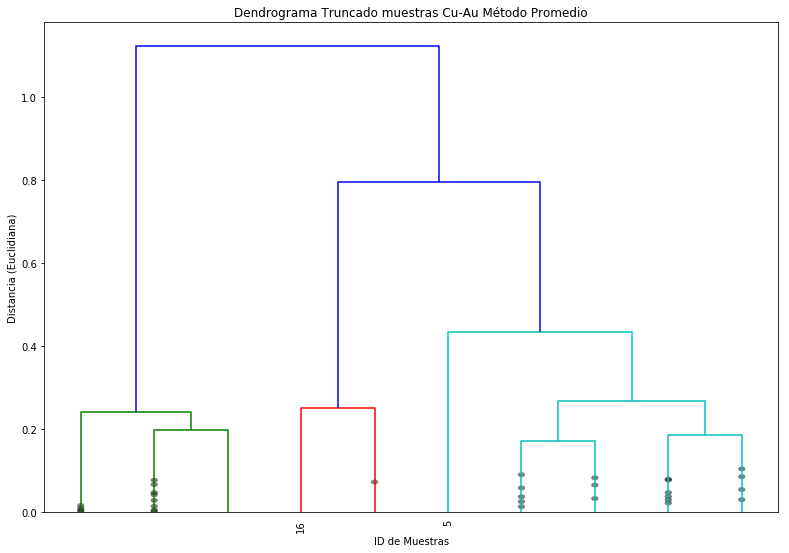

In [27]:
plt.subplot(111)
dendrogram(Z, leaf_rotation=90, leaf_font_size=10, truncate_mode="lastp", p=10, show_leaf_counts=False, show_contracted=True)
plt.title("Dendrograma Truncado muestras Cu-Au Método Promedio")
plt.ylabel("Distancia (Euclidiana)")
plt.xlabel("ID de Muestras")
plt.subplots_adjust(left=0, bottom=0.0, right=1.7, top=1.7, wspace=0.2, hspace=0.2)

plt.show()

**Corte automatico del Dendrograma:** inconsistency_i = (h_i_avg(h_j)) / std(h_j)

In [28]:
from scipy.cluster.hierarchy import inconsistent

In [29]:
depth=5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 0.08712481,  0.05088544,  5.        ,  1.48134114],
       [ 0.07209864,  0.04674284, 11.        ,  2.13488717],
       [ 0.0789261 ,  0.0513991 , 13.        ,  2.0792062 ],
       [ 0.06820822,  0.05699243, 10.        ,  2.2776515 ],
       [ 0.08284011,  0.07322231, 12.        ,  2.17410181],
       [ 0.15577115,  0.09018893,  3.        ,  1.06141855],
       [ 0.09831992,  0.05908353, 20.        ,  2.84507924],
       [ 0.14007249,  0.09915899, 15.        ,  2.95783266],
       [ 0.23449759,  0.20203846, 12.        ,  2.78083672],
       [ 0.24141139,  0.28660189, 18.        ,  3.07737188]])

**Método del codo:**

[1.12339199 0.79633356 0.43336819 0.26641723 0.25149935 0.24203286
 0.19801711 0.18579544 0.17188933 0.16250352]


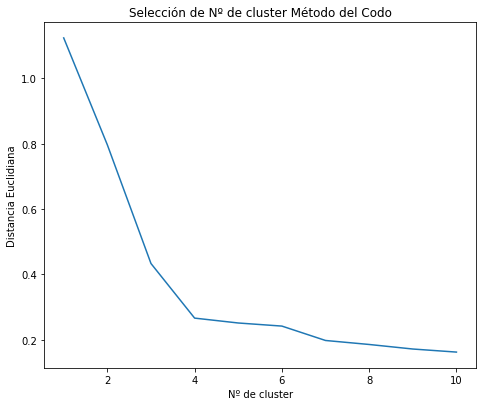

In [30]:
last = Z[-10:,2] # 10 ultimas distancias de la matriz (las mas altas)
last_rev = last[::-1] # se dan vuelta las distancias quedando de inicio a fin como mayor a menor
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.subplot(111)
plt.plot(idx, last_rev)
plt.title("Selección de Nº de cluster Método del Codo")
plt.ylabel("Distancia Euclidiana")
plt.xlabel("Nº de cluster")
plt.subplots_adjust(left=0, bottom=0.0, right=1, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

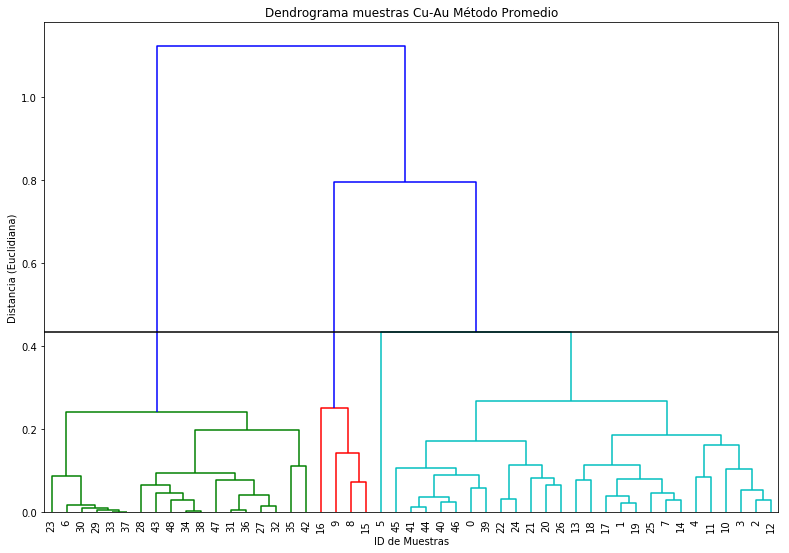

In [31]:
plt.subplot(111)
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.plot([0,1000],[0.43336819,0.43336819],color = 'black')
plt.title("Dendrograma muestras Cu-Au Método Promedio")
plt.ylabel("Distancia (Euclidiana)")
plt.xlabel("ID de Muestras")
plt.subplots_adjust(left=0, bottom=0.0, right=1.7, top=1.7, wspace=0.2, hspace=0.2)
plt.show()

**RECUPERAR CLUSTERS Y SUS ELEMENTOS:**

In [32]:
from scipy.cluster.hierarchy import fcluster

In [33]:
max_d = 0.45
clusters = fcluster(Z, max_d, criterion="distance") #criterio de corte por distancia
clusters

array([3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1,
       3, 3, 3, 1, 1], dtype=int32)

In [34]:
k = 3
clusters = fcluster(Z, k, criterion="maxclust") #criterio de corte por Nº de clusters
df_clusters = pd.DataFrame(clusters, columns=["clusters"])
df_clusters.head()

,clusters
0,3
1,3
2,3
3,3
4,3


In [35]:
df["clusters"] = df_clusters["clusters"]
df.head()

,ID,X,Y,CU,AU,ROCK,CU_N,AU_N,ROCK_N,clusters
0,1,250,1750,1.079773,7.011241,2,0.245556,0.481137,1.0,3
1,2,250,1500,1.520868,7.368296,2,0.349926,0.514722,1.0,3
2,3,250,1250,1.623301,6.454517,2,0.374163,0.428771,1.0,3
3,4,250,1000,1.696151,5.745868,2,0.391401,0.362114,1.0,3
4,5,250,750,2.240153,7.373803,2,0.520120,0.515240,1.0,3


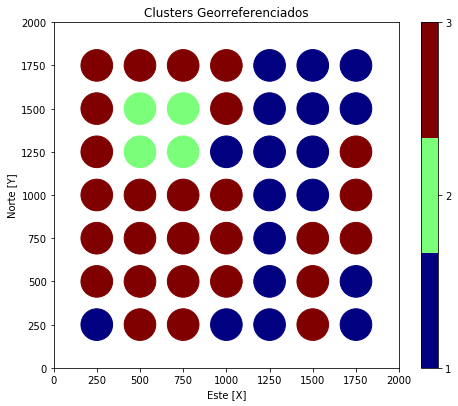

In [36]:
marker_size=1000
plt.subplot(111)
plt.scatter(df["X"], df["Y"], marker_size, df["clusters"], cmap=plt.cm.get_cmap('jet', 3))
plt.colorbar(ticks=[1, 2, 3])
plt.xlabel('Este [X]')
plt.ylabel('Norte [Y]')
plt.title('Clusters Georreferenciados')
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.subplots_adjust(left=0, bottom=0.0, right=1, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

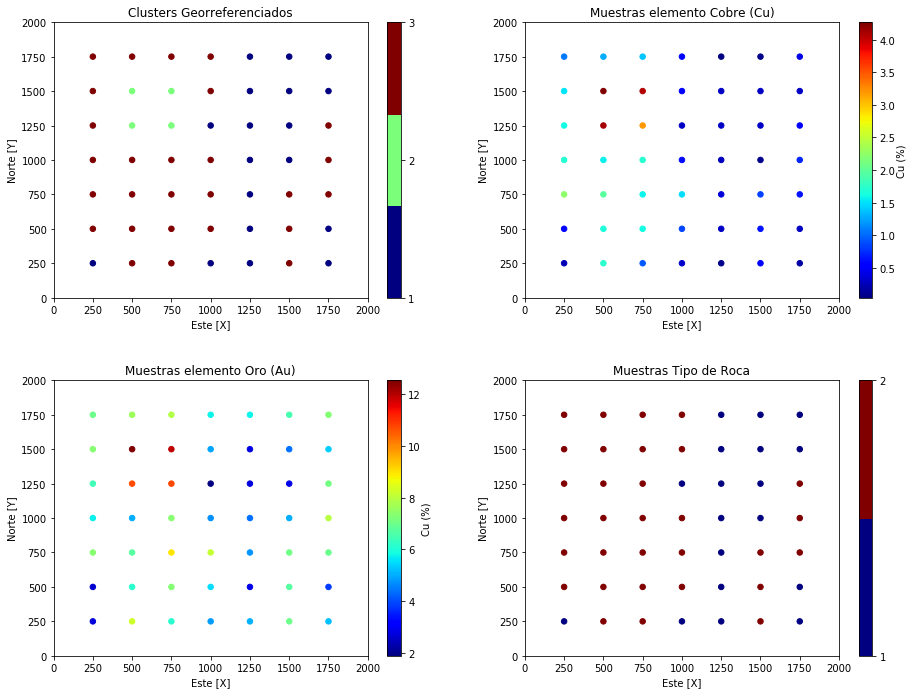

In [40]:
marker_size=30
plt.subplot(221) 
plt.scatter(df["X"], df["Y"], marker_size, df["clusters"], cmap=plt.cm.get_cmap('jet', 3))
plt.colorbar(ticks=[1, 2, 3])
plt.xlabel('Este [X]')
plt.ylabel('Norte [Y]')
plt.title('Clusters Georreferenciados')
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.subplot(222) 
plt.scatter(df["X"], df["Y"], marker_size, df["CU"], cmap = plt.cm.jet)
plt.xlabel('Este [X]')
plt.ylabel('Norte [Y]')
plt.title('Muestras elemento Cobre (Cu)')
plt.xlim(0,2000)
plt.ylim(0,2000)
cbar=plt.colorbar()
cbar.set_label('Cu (%)', labelpad=+1)
plt.subplot(223) 
plt.scatter(df["X"], df["Y"], marker_size, df["AU"], cmap = plt.cm.jet)
plt.xlabel('Este [X]')
plt.ylabel('Norte [Y]')
plt.title('Muestras elemento Oro (Au)')
plt.xlim(0,2000)
plt.ylim(0,2000)
cbar=plt.colorbar()
cbar.set_label('Cu (%)', labelpad=+1)
plt.subplot(224) 
plt.scatter(df["X"], df["Y"], marker_size, df["ROCK"], cmap=plt.cm.get_cmap('jet', 2))
plt.colorbar(ticks=[1, 2])
plt.xlabel('Este [X]')
plt.ylabel('Norte [Y]')
plt.title('Muestras Tipo de Roca')
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

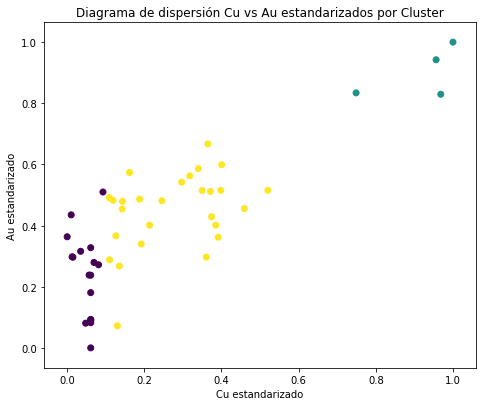

In [38]:
plt.subplot(111)
plt.scatter(df["CU_N"], df["AU_N"], c=clusters, cmap="viridis")
plt.title("Diagrama de dispersión Cu vs Au estandarizados por Cluster")
plt.ylabel("Au estandarizado")
plt.xlabel("Cu estandarizado")
plt.subplots_adjust(left=0, bottom=0.0, right=1, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [39]:
df.groupby("clusters")["CU"].describe().transpose() #estadísticos por cluster

clusters,1,2,3
count,18.000000,4.000000,27.000000
mean,0.255591,3.923338,1.191788
std,0.108117,0.483922,0.527897
min,0.041994,3.206915,0.504078
25%,0.203404,3.864363,0.646269
50%,0.300000,4.109096,1.296629
75%,0.300000,4.168070,1.617326
max,0.434153,4.268244,2.240153
